In [35]:
import pandas as pd
from pandas import Series

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

import seaborn as seaborn

from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn import metrics

import statsmodels.api as sm
import scipy.stats as ss

from statsmodels.formula.api import ols

In [36]:
def get_targets_grouped_by_factor(target, factor, dataframe):
    tupled_factor_and_target =  [z for z in zip(dataframe[factor], dataframe[target])]

    unique_levels = sorted(set([i[0] for i in tupled_factor_and_target]))

    level_groups = []
    for level in unique_levels:
        #print("Processing Factor: {} | Level: {}".format(factor, level))
        level_subgroup = [x[1] for x in tupled_factor_and_target if x[0] == level]
        level_groups.append(level_subgroup)
    
    return level_groups

In [37]:
diamonds_dataset = pd.read_csv('https://raw.githubusercontent.com/nlucian/time-series-analysis/master/diamonds.csv', index_col = 0)

In [38]:
diamonds_dataset.head(3)
diamonds_dataset = diamonds_dataset.rename(columns = {'cut':'cut_quality', 'x': 'length_mm', 'y': 'width_mm', 'z': 'depth_mm'})
diamonds_dataset.head(3)

,carat,cut_quality,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [39]:
diamonds_dataset.isnull().any()

carat          False
cut_quality    False
color          False
clarity        False
depth          False
table          False
price          False
length_mm      False
width_mm       False
depth_mm       False
dtype: bool

In [40]:
print("Total Diamonds {}".format(diamonds_dataset.price.count()))

Total Diamonds 53940


In [41]:
# fair 5
# good = 4
# very good 3
# premium = 2
# ideal = 1
diamonds_dataset.cut_quality.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [42]:
# https://www.lumeradiamonds.com/diamond-education/diamond-color

# D - 1
# E - 2
# F - 3
# G - 4
# H - 5
# I - 6
# J - 7
diamonds_dataset.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [43]:
diamonds_dataset.loc[diamonds_dataset['cut_quality'] == 'Ideal', 'cut_quality']     = 1
diamonds_dataset.loc[diamonds_dataset['cut_quality'] == 'Premium', 'cut_quality']   = 2
diamonds_dataset.loc[diamonds_dataset['cut_quality'] == 'Very Good', 'cut_quality'] = 3
diamonds_dataset.loc[diamonds_dataset['cut_quality'] == 'Good', 'cut_quality']      = 4
diamonds_dataset.loc[diamonds_dataset['cut_quality'] == 'Fair', 'cut_quality']      = 5

diamonds_dataset.loc[diamonds_dataset['color'] == 'D', 'color'] = '1'
diamonds_dataset.loc[diamonds_dataset['color'] == 'E', 'color'] = '2'
diamonds_dataset.loc[diamonds_dataset['color'] == 'F', 'color'] = '3'
diamonds_dataset.loc[diamonds_dataset['color'] == 'G', 'color'] = '4'
diamonds_dataset.loc[diamonds_dataset['color'] == 'H', 'color'] = '5'
diamonds_dataset.loc[diamonds_dataset['color'] == 'I', 'color'] = '6'
diamonds_dataset.loc[diamonds_dataset['color'] == 'J', 'color'] = '7'

In [44]:
diamonds_dataset.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [45]:
del diamonds_dataset['clarity']

In [46]:
diamonds_dataset.head(5)

,carat,cut_quality,color,depth,table,price,length_mm,width_mm,depth_mm
1,0.23,1,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,2,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,4,2,56.9,65.0,327,4.05,4.07,2.31
4,0.29,2,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,4,7,63.3,58.0,335,4.34,4.35,2.75


In [47]:
diamonds_dataset['cut_quality'] = diamonds_dataset['cut_quality'].astype(int)
diamonds_dataset['color'] = diamonds_dataset['color'].astype(int)
diamonds_dataset['price'] = diamonds_dataset['price'].astype(int)

diamonds_dataset.dtypes

carat          float64
cut_quality      int64
color            int64
depth          float64
table          float64
price            int64
length_mm      float64
width_mm       float64
depth_mm       float64
dtype: object

In [49]:
X, Y = diamonds_dataset.iloc[:, diamonds_dataset.columns != 'price'].values, diamonds_dataset.iloc[:, diamonds_dataset.columns == 'price']

In [50]:
diamonds_dataset.dtypes

carat          float64
cut_quality      int64
color            int64
depth          float64
table          float64
price            int64
length_mm      float64
width_mm       float64
depth_mm       float64
dtype: object

In [51]:
print(len(Y))
print(len(X))

53940
53940


In [52]:
print(min(diamonds_dataset['price']))
print(max(diamonds_dataset['price']))

326
18823


In [53]:
min(diamonds_dataset['price'])

326

In [54]:
max(diamonds_dataset['price'])

18823

In [55]:
bin_values = np.arange(start= min(diamonds_dataset['price']), stop = max(diamonds_dataset['price']), step = 1000)

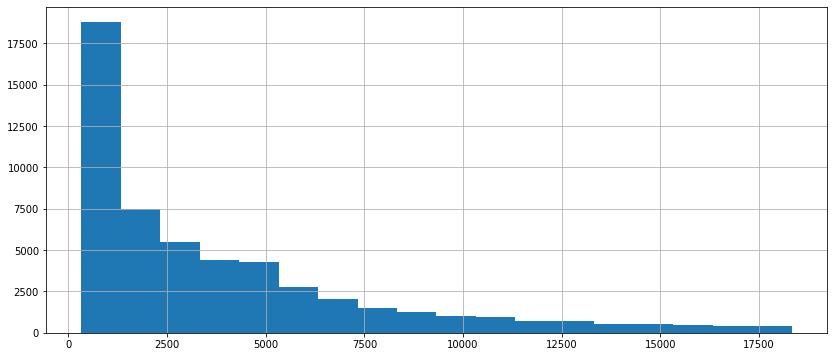

In [56]:
diamonds_dataset['price'].hist(bins=bin_values, figsize=[14,6])

In [57]:
correlation = diamonds_dataset.corr()

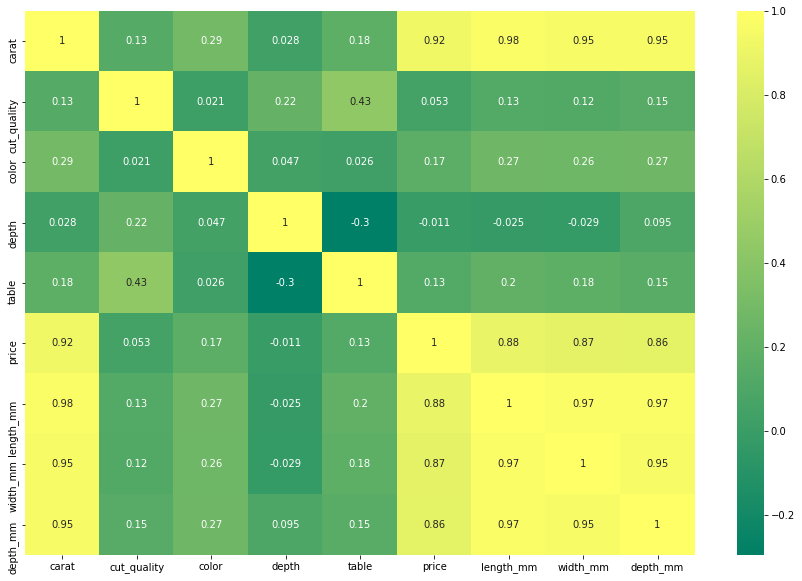

In [58]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
ax = seaborn.heatmap(correlation, annot=True, cmap = 'summer')

In [59]:
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(X, Y, test_size = 0.2)

print(len(y_data_test))
print(len(x_data_test))

print(len(x_data_train))
print(len(y_data_train))

10788
10788
43152
43152


In [60]:
def executeStatsModel(x_train, x_test, y_train, y_test):
    model = sm.OLS(y_train, x_train)
    fitted_model = model.fit()
    
    fig = plt.figure(figsize=(12,8))
    sm.graphics.plot_partregress_grid(fitted_model, fig=fig)
    
    prediction = fitted_model.predict(x_test)    
    print("Mean Squared Error: {}".format(metrics.mean_squared_error(prediction, y_test)))
    print("R squared: {}".format(metrics.r2_score(y_test, prediction)))
    
    print("")
    print(fitted_model.summary())
    

    return prediction

Mean Squared Error: 1985123.550963516
R squared: 0.8709209215106097

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          7.563e+04
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:53:27   Log-Likelihood:                     -3.7533e+05
No. Observations:               43152   AIC:                                  7.507e+05
Df Residuals:                   43144   BIC:                                  7.507e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

array([14511.45484636,   519.88564616,   408.73783176, ...,
         352.57141415,  7862.59918053,   -56.53836834])

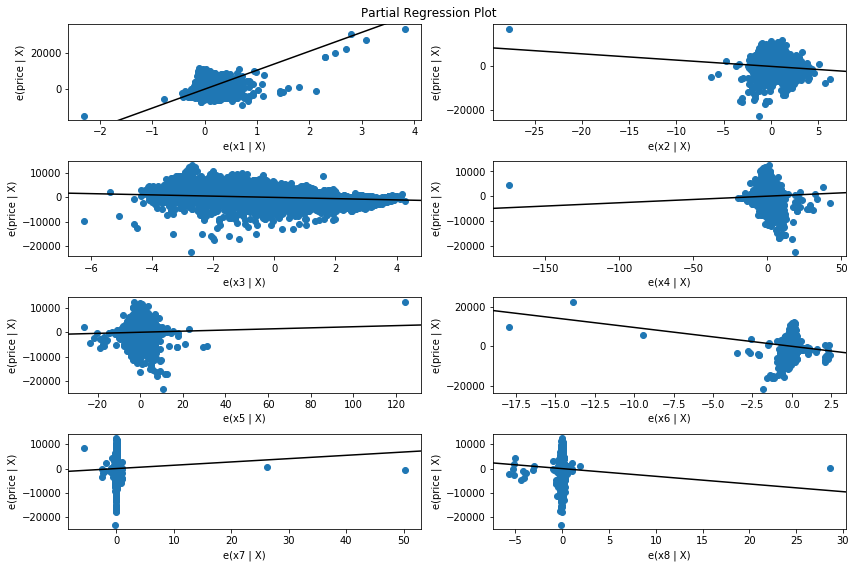

In [61]:
executeStatsModel(x_data_train, x_data_test, y_data_train, y_data_test)

In [62]:
y_data_test = np.log(y_data_test)
y_data_train = np.log(y_data_train)

In [63]:
bin_values = np.arange(start= min(y_data_train['price']), stop = max(y_data_train['price']), step = 0.1)

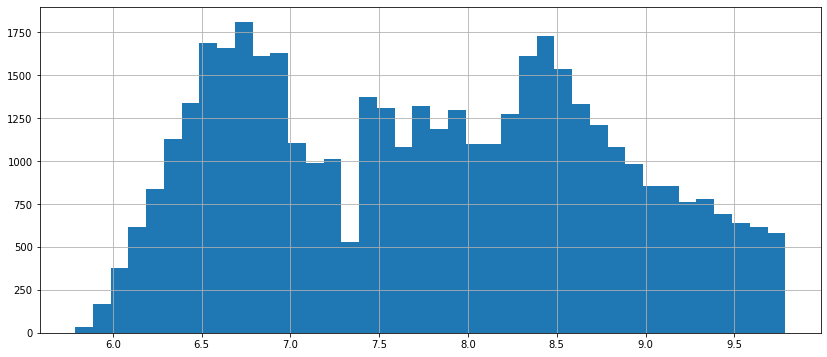

In [64]:
y_data_train['price'].hist(bins=bin_values, figsize=[14,6])

Mean Squared Error: 0.062144558511871215
R squared: 0.9390940243679475

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.952e+06
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:53:29   Log-Likelihood:                         -2937.3
No. Observations:               43152   AIC:                                      5891.
Df Residuals:                   43144   BIC:                                      5960.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t     

array([9.81193931, 6.61188902, 6.60231198, ..., 6.70924294, 9.14576728,
       6.42837389])

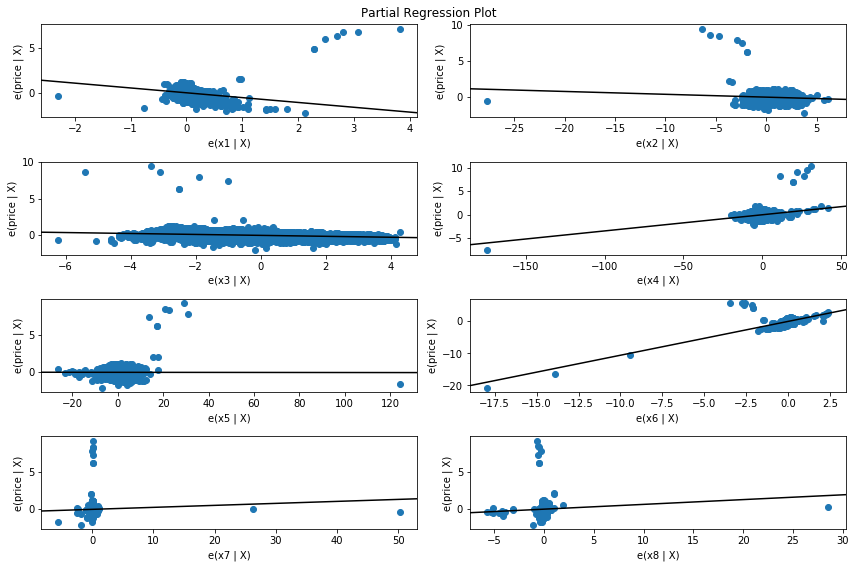

In [65]:
executeStatsModel(x_data_train, x_data_test, y_data_train, y_data_test)

In [66]:
del diamonds_dataset['table']

In [67]:
X_column_dropped, Y_column_dropped = diamonds_dataset.iloc[:, diamonds_dataset.columns != 'price'].values, diamonds_dataset.iloc[:, diamonds_dataset.columns == 'price']

In [68]:
x_data_train_col_drop, x_data_test_col_drop, y_data_train_col_drop, y_data_test_col_drop = train_test_split(X_column_dropped, Y_column_dropped, test_size = 0.2)

Mean Squared Error: 0.071932863667963
R squared: 0.930674794747574

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.753e+06
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:53:31   Log-Likelihood:                         -2591.5
No. Observations:               43152   AIC:                                      5197.
Df Residuals:                   43145   BIC:                                      5258.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|

array([7.19692241, 8.37092056, 8.49192111, ..., 6.64633937, 8.3668839 ,
       7.34471011])

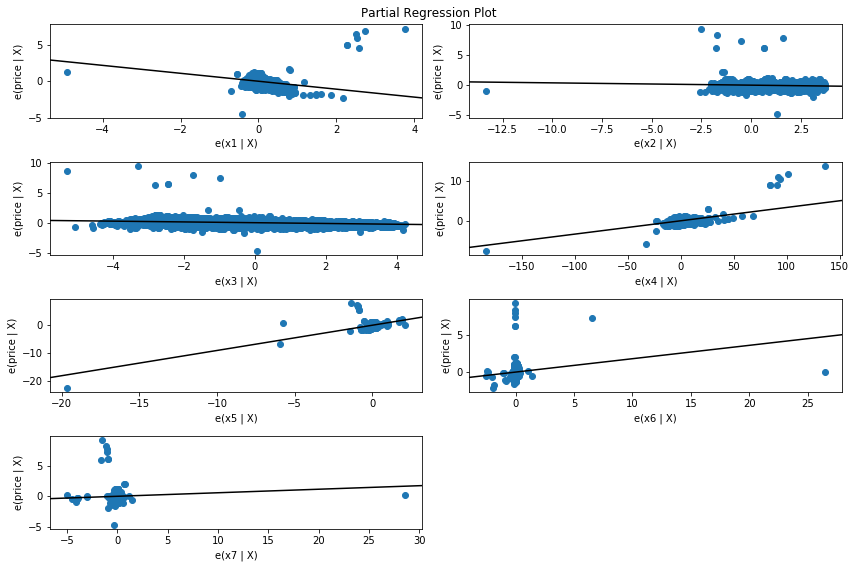

In [69]:
y_data_test_col_drop = np.log(y_data_test_col_drop)
y_data_train_col_drop = np.log(y_data_train_col_drop)

executeStatsModel(x_data_train_col_drop, x_data_test_col_drop, y_data_train_col_drop, y_data_test_col_drop)

In [70]:
diamonds_dataset.head(5)

,carat,cut_quality,color,depth,price,length_mm,width_mm,depth_mm
1,0.23,1,2,61.5,326,3.95,3.98,2.43
2,0.21,2,2,59.8,326,3.89,3.84,2.31
3,0.23,4,2,56.9,327,4.05,4.07,2.31
4,0.29,2,6,62.4,334,4.20,4.23,2.63
5,0.31,4,7,63.3,335,4.34,4.35,2.75


In [71]:
diamonds_dataset.head(2)

,carat,cut_quality,color,depth,price,length_mm,width_mm,depth_mm
1,0.23,1,2,61.5,326,3.95,3.98,2.43
2,0.21,2,2,59.8,326,3.89,3.84,2.31


In [72]:
factor_cut_quality_grp = get_targets_grouped_by_factor('price', 'cut_quality', diamonds_dataset)
factor_color_grp = get_targets_grouped_by_factor('color', 'cut_quality', diamonds_dataset)

In [73]:
len(factor_cut_quality_grp)

5

In [74]:
print("factor_1 - cut_quality {}".format(ss.bartlett(*factor_cut_quality_grp)))
print("factor_2 - color_grp {}".format(ss.bartlett(*factor_color_grp)))

factor_1 - cut_quality BartlettResult(statistic=406.6960562289963, pvalue=9.94131729362807e-87)
factor_2 - color_grp BartlettResult(statistic=37.23867630306004, pvalue=1.6084535985684938e-07)


In [75]:
print("factor_1 - cut_quality {}".format(ss.levene(*factor_cut_quality_grp)))
print("factor_2 - color_grp {}".format(ss.levene(*factor_color_grp)))

factor_1 - cut_quality LeveneResult(statistic=123.59529396129993, pvalue=3.360146858232803e-105)
factor_2 - color_grp LeveneResult(statistic=14.383102882970482, pvalue=9.703535562677078e-12)


In [76]:
dd_no_median = diamonds_dataset.copy()

# https://www.graphpad.com/support/faq/what-to-do-when-data-fail-tests-for-homogeneity-of-variance/
dd_no_median['price'] = np.abs(diamonds_dataset['price'] - pd.DataFrame.median(diamonds_dataset['price']))
dd_no_median.head(3)

,carat,cut_quality,color,depth,price,length_mm,width_mm,depth_mm
1,0.23,1,2,61.5,2075.0,3.95,3.98,2.43
2,0.21,2,2,59.8,2075.0,3.89,3.84,2.31
3,0.23,4,2,56.9,2074.0,4.05,4.07,2.31


In [77]:
factor_cut_quality_grp = get_targets_grouped_by_factor('price', 'cut_quality', dd_no_median)
factor_color_grp = get_targets_grouped_by_factor('price', 'color', dd_no_median)

In [78]:
print("factor_1 - cut_quality {}".format(ss.bartlett(*factor_cut_quality_grp)))
print("factor_2 - color_grp {}".format(ss.bartlett(*factor_color_grp)))

factor_1 - cut_quality BartlettResult(statistic=587.4479499778415, pvalue=8.06703470987798e-126)
factor_2 - color_grp BartlettResult(statistic=2056.01259446102, pvalue=0.0)


In [79]:
dd_no_median = dd_no_median[['cut_quality', 'color', 'price']]
len(factor_cut_quality_grp)

5

In [80]:
# https://www.quora.com/Can-we-use-the-ANOVA-test-if-the-homogeneity-condition-is-rejected-through-the-Bartlett-test
mlm = ols('price ~ C(cut_quality)', data=dd_no_median).fit()

In [81]:
anova_result = sm.stats.anova_lm(mlm, typ=2) 
anova_result

,sum_sq,df,F,PR(>F)
C(cut_quality),4.758131e+09,4.0,115.59364,2.436200e-98
Residual,5.550257e+11,53935.0,NaN,NaN


In [82]:
mlm = ols('price ~ C(color)', data=dd_no_median).fit()

In [83]:
anova_result = sm.stats.anova_lm(mlm, typ=2) 
anova_result

,sum_sq,df,F,PR(>F)
C(color),1.476852e+10,6.0,243.57444,1.900774e-308
Residual,5.450153e+11,53933.0,NaN,NaN
